In [2]:
#import all Libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_csv("insurance .csv")
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
# seperate the data into numeric and categorical
df_num = df[['age','bmi','children','expenses']]
df_cat = df[['sex','smoker','region']]

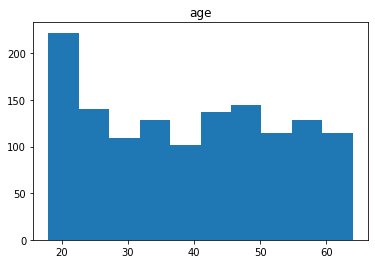

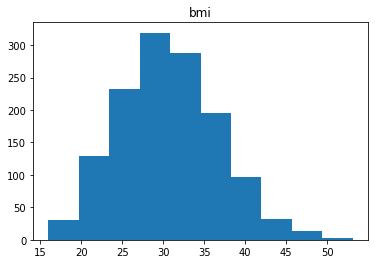

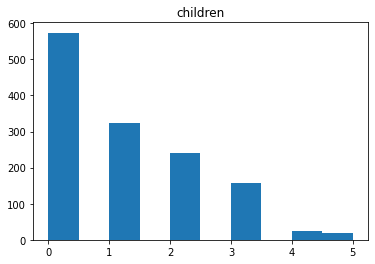

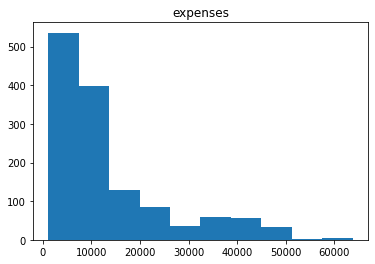

In [13]:
import matplotlib.pyplot as plt
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


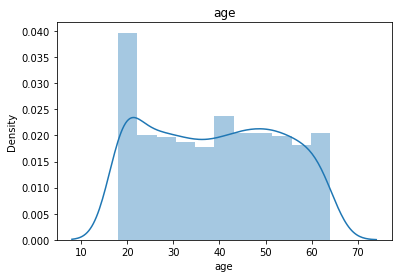

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


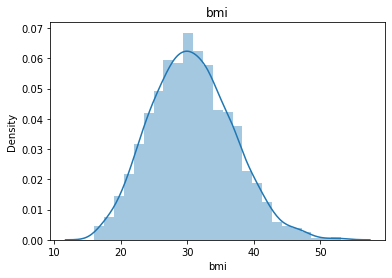

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


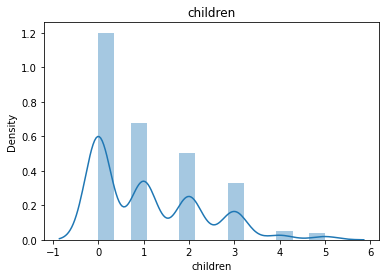

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


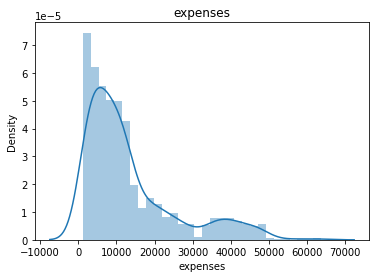

In [14]:
import seaborn as sns
for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.title(i)
    plt.show()

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


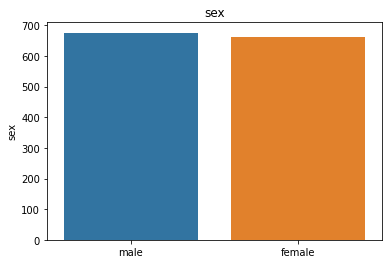

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


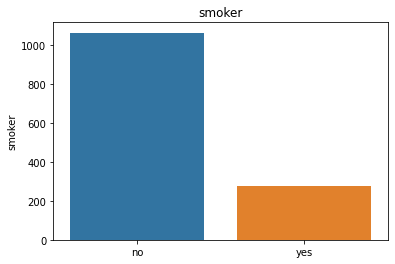

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


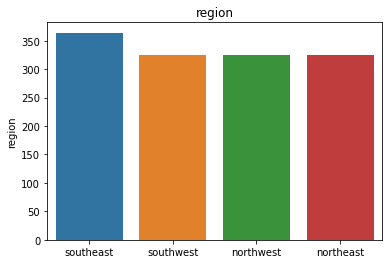

In [15]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('expenses', 1),df['expenses'],test_size = 0.2, random_state = 0)


C:\Users\NIKHAT~1\AppData\Local\Temp/ipykernel_5764/3808965698.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(df.drop('expenses', 1),df['expenses'],test_size = 0.2, random_state = 0)


In [17]:
trf1 = ColumnTransformer(transformers =[
    ('cat', SimpleImputer(strategy ='most_frequent'), ['sex', 'smoker', 'region']),
    ('num', SimpleImputer(strategy ='median'), ['age', 'bmi', 'children']),
      
], remainder ='passthrough')

In [18]:
first_step = trf1.fit_transform(X_train)
first_step

array([['male', 'yes', 'southwest', 37.0, 34.1, 4.0],
       ['male', 'no', 'southeast', 18.0, 34.4, 0.0],
       ['female', 'yes', 'northeast', 23.0, 36.7, 2.0],
       ...,
       ['male', 'no', 'southeast', 40.0, 25.1, 0.0],
       ['male', 'no', 'northwest', 19.0, 35.5, 0.0],
       ['female', 'no', 'southwest', 33.0, 18.5, 1.0]], dtype=object)

In [19]:
pd.DataFrame(first_step).head()

,0,1,2,3,4,5
0,male,yes,southwest,37.0,34.1,4.0
1,male,no,southeast,18.0,34.4,0.0
2,female,yes,northeast,23.0,36.7,2.0
3,male,no,southwest,32.0,35.2,2.0
4,female,no,northeast,58.0,32.4,1.0


In [20]:
pd.DataFrame(first_step).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [21]:
trf1.named_transformers_
# this is a dictionary, with the names of the transformers as keys.


{'cat': SimpleImputer(strategy='most_frequent'),
 'num': SimpleImputer(strategy='median')}

In [22]:
trf1.named_transformers_['num'].statistics_
# you see, these were the median values of each of the three numerical columns.
# for any transformer, you can access its specific attributes this way.


array([39. , 30.4,  1. ])

In [23]:
trf2 = ColumnTransformer(transformers =[
    ('enc', OneHotEncoder(sparse = False, drop ='first'), list(range(3))),
], remainder ='passthrough')

In [24]:
second_step = trf2.fit_transform(first_step)
pd.DataFrame(second_step).head()

# Now we have our one hot encoded data ! Sweet !

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,1.0,37.0,34.1,4.0
1,1.0,0.0,0.0,1.0,0.0,18.0,34.4,0.0
2,0.0,1.0,0.0,0.0,0.0,23.0,36.7,2.0
3,1.0,0.0,0.0,0.0,1.0,32.0,35.2,2.0
4,0.0,0.0,0.0,0.0,0.0,58.0,32.4,1.0


In [25]:
pipe = Pipeline(steps =[
    ('tf1', trf1),
    ('tf2', trf2),
    ('tf3', MinMaxScaler()), # or StandardScaler, or any other scaler
    ('model', RandomForestRegressor(n_estimators = 200)),
# or LinearRegression, SVR, DecisionTreeRegressor, etc
])


In [26]:
# we'll use cross_val_score with 5 splits to better examine our model.
# we'll send our entire 'pipe' object to the cross_val_score and it will take
cvs = cross_val_score(pipe, X_train, y_train, cv = 5)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())


All cross val scores: [0.84980208 0.81393274 0.80109305 0.82157483 0.77368053]
Mean of all scores:  0.8120166466457756


In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2])])),
                ('tf3', MinMaxScaler()),
          

In [28]:
preds = pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': preds})


,original test set,predictions
578,9724.53,10332.94495
610,8547.69,9626.04570
569,45702.02,44299.35570
1034,12950.07,13275.42630
198,9644.25,9944.73205
...,...,...
1084,15019.76,16379.59305
726,6664.69,6655.09195
1132,20709.02,11357.47450
725,40932.43,42614.49705


In [29]:
import pickle
pickle.dump(pipe,open('Insurance_rfr_Pipe_Sc.pkl','wb'))

In [30]:
model = pickle.load(open('Insurance_rfr_Pipe_Sc.pkl','rb'))

In [31]:
model.predict(X_test)

array([10332.94495   ,  9626.0457    , 44299.3557    , 13275.4263    ,
        9944.73205   , 11719.7501    ,  2058.08695   , 12284.17475   ,
        7662.3758    ,  6211.639     ,  7188.4167    , 19758.678     ,
        8252.65115   ,  6184.43565   , 24560.31695   , 13233.6623    ,
       13825.0666    ,  7127.0936    ,  6597.7114    , 34078.0121    ,
       23940.348     , 13640.50075   , 10466.9534    , 27057.30165   ,
        3375.4598    ,  5620.854     ,  6511.14835   ,  8313.23555   ,
        3919.7112    , 11566.5027    ,  7870.1854    , 48272.07765   ,
       14530.63385   , 10894.9567    , 15490.64035   ,  3872.6378    ,
        9022.8287    , 38129.39875   , 40473.45895   ,  6030.63955   ,
       10396.162     ,  3954.69775   , 20547.54415   , 47569.8947    ,
       36974.19555   ,  5741.26415   , 13430.57035   ,  6832.70495   ,
        5494.0245    , 13687.48145   ,  3482.53055   , 14280.8253    ,
       27649.8843    , 48812.9034    , 11696.95005   ,  7257.0609    ,
      